In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import g as g0

In [2]:
def load_report(path):
    return np.fromfile(path, sep = ' ').reshape((-1,7))

mjd_unixtimestamp_offset = 10587.5
seconds_in_day = 3600 * 24

def mjd2unixtimestamp(m):
    return (m - mjd_unixtimestamp_offset) * seconds_in_day

In [3]:
pre = load_report('orbit/dsm/Tianwen1_preDSM.txt')
post = load_report('orbit/dsm/Tianwen1_postDSM.txt')[::-1]
t = np.datetime64('1970-01-01') + (mjd2unixtimestamp(pre[:,0]) * 1e9) * np.timedelta64(1, 'ns')

In [4]:
post_interp = np.empty_like(pre)
post_interp[:,0] = pre[:,0]
for j in range(1, post_interp.shape[1]):
    post_interp[:,j] = np.interp(post_interp[:,0], post[:,0], post[:,j], left = np.nan, right = np.nan)

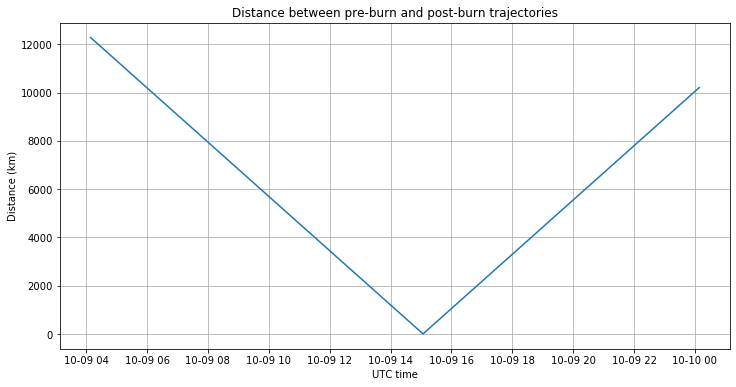

In [5]:
plt.figure(figsize = (12,6), facecolor = 'w')
dist = np.sqrt(np.sum((pre[:,1:4] - post_interp[:,1:4])**2, axis = 1))
plt.plot(t, dist)
plt.grid()
plt.title('Distance between pre-burn and post-burn trajectories')
plt.xlabel('UTC time')
plt.ylabel('Distance (km)');

In [6]:
burn_idx = np.argmin(dist[~np.isnan(dist)])
t[burn_idx]

numpy.datetime64('2020-10-09T15:03:54.068000000')

In [7]:
dist[burn_idx]

0.6252964600998367

In [8]:
delta_v_ms = (post_interp[burn_idx, 4:] - pre[burn_idx, 4:]) * 1e3
delta_v_ms

array([-31.08193895,  40.28872314, 308.12845989])

In [9]:
delta_v_norm = np.sqrt(np.sum(delta_v_ms**2))
delta_v_norm

312.30180264819364

In [10]:
z_angle = np.rad2deg(np.arccos(delta_v_ms[2]/delta_v_norm))
z_angle

9.377287484840641

In [11]:
u_DSM = delta_v_ms/delta_v_norm
delta_v_ms_tcm2 = np.array([-0.2795918 ,  0.68354296,  4.23141581])
u_TCM2 = delta_v_ms_tcm2/np.sqrt(np.sum(delta_v_ms_tcm2**2))
np.rad2deg(np.arccos(np.sum(u_DSM * u_TCM2)))

2.623211536103246

In [12]:
# Burn of 3kN for 480 seconds
F = 3000
T = 480
m = 5000
delta_v_press_release = F/m*T
delta_v_press_release

288.0

In [13]:
Isp = 321.6
m_dot = F / (g0 * Isp)
m_dot

0.9512278106137391

In [14]:
Isp * g0 * np.log(m / (m - m_dot * T))

302.0094765814904